In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os
import seaborn as sns
import glob
import natsort

In [6]:
import seaborn as sns
import copy

def load_data():
    datas = list()
    save_path = "../Output/CIFAR100-*B0-D0*-N100-P0.01*/s[1-9].csv"
    path_list = glob.glob(save_path)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "Balanced IID partition", 
                                                0.3: "Balanced Dirichlet partition (α=0.3)", 
                                                })
    # print(data_temp.size)
    return data_temp

In [111]:
def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):

        if "ortho" in path: continue
        if "GNStop" in path: continue
        if "G15" in path: continue
        if "SWA" in path: continue
        if "FConly" in path: continue

        data = pd.read_csv(path)
        data["Mode"] = data["mode"]

        if "Mean5" in path:
            data["Mode"] += "_M5"
        elif "Mean" in path:
            continue        
        elif "LogitNorm_BNinit0" in path:
            data["Mode"] += "LogitNorm+BN"
            continue
        elif "BN00+G00" in path:
            data["Mode"] += "_BN00"
            continue
        elif "BN00+G01" in path:
            data["Mode"] += "_BN01"
            continue
        elif "BNinit0" in path:
            data["Mode"] += "BNinit0"
            continue
        elif "fc" in path:
            continue
        elif "ec" in path:
            continue
        elif "FCs" in path and "Mean5" not in path:
            continue




        if "ortFC10" in path:
            data["Mode"] += "ortFC10"
            continue
        elif "ortFC1" in path:
            data["Mode"] += "ortFC1"
            # continue
        elif "ortFC2" in path:
            data["Mode"] += "ortFC2"
            continue
        elif "ortFC3-LR0.5" in path: continue
        elif "ortFC3-LR0.2" in path: continue
        elif "ortFC3-LR0.05" in path: continue
        elif "ortFC3" in path:
            data["Mode"] += "ortFC3"
            continue
        elif "ortFC4" in path:
            data["Mode"] += "ortFC4"
            continue
        elif "ortFC5" in path:
            data["Mode"] += "ortFC5"
            continue
        elif "ortFC6" in path:
            data["Mode"] += "ortFC6"
            continue
        elif "ortFC7" in path:
            data["Mode"] += "ortFC7"
            continue
        elif "ortFC8" in path:
            data["Mode"] += "ortFC8"
            # continue
        elif "ortFC9" in path:
            data["Mode"] += "ortFC9"
            # continue
            # continue

        if "FCs" in path: 
            continue

        if "w1b1" in path: 
            data["Mode"] += "_w1b1"
            # continue
        elif "w1" in path: 
            data["Mode"] += "_w1"
            # continue
        elif "b1" in path: 
            data["Mode"] += "_b1"
            continue

        if "__PCOS1/" in path and "G05":
            data["Mode"] += "_PCOS1"
            # continue        
        if "PCOS1_Mean5-LR0.1" in path and "G05" in path and "PCOS1" in path:
            data["Mode"] += "_PCOS1"
        elif "PCOS1_Mean5-LR1.0" in path and "G15" in path and "PCOS1" in path:
            data["Mode"] += "_PCOS1"
            continue
        elif "PCOS1_Mean5-LR2.0" in path and "G15" in path and "PCOS1" in path:
            data["Mode"] += "_PCOS1"
            continue
        
        if len(data_) == 0: 
            # print(path)
            data_ = data
        else: 
            # print(path)
            data_ = pd.concat([data_, data])
    return data_

[Text(0, 0, 'fedavg_M5ortFC9'), Text(1, 0, 'fedavg_M5'), Text(2, 0, 'fedavg_M5ortFC8'), Text(3, 0, 'fedavg_M5ortFC1'), Text(4, 0, 'fedavg_M5_PCOS1')]


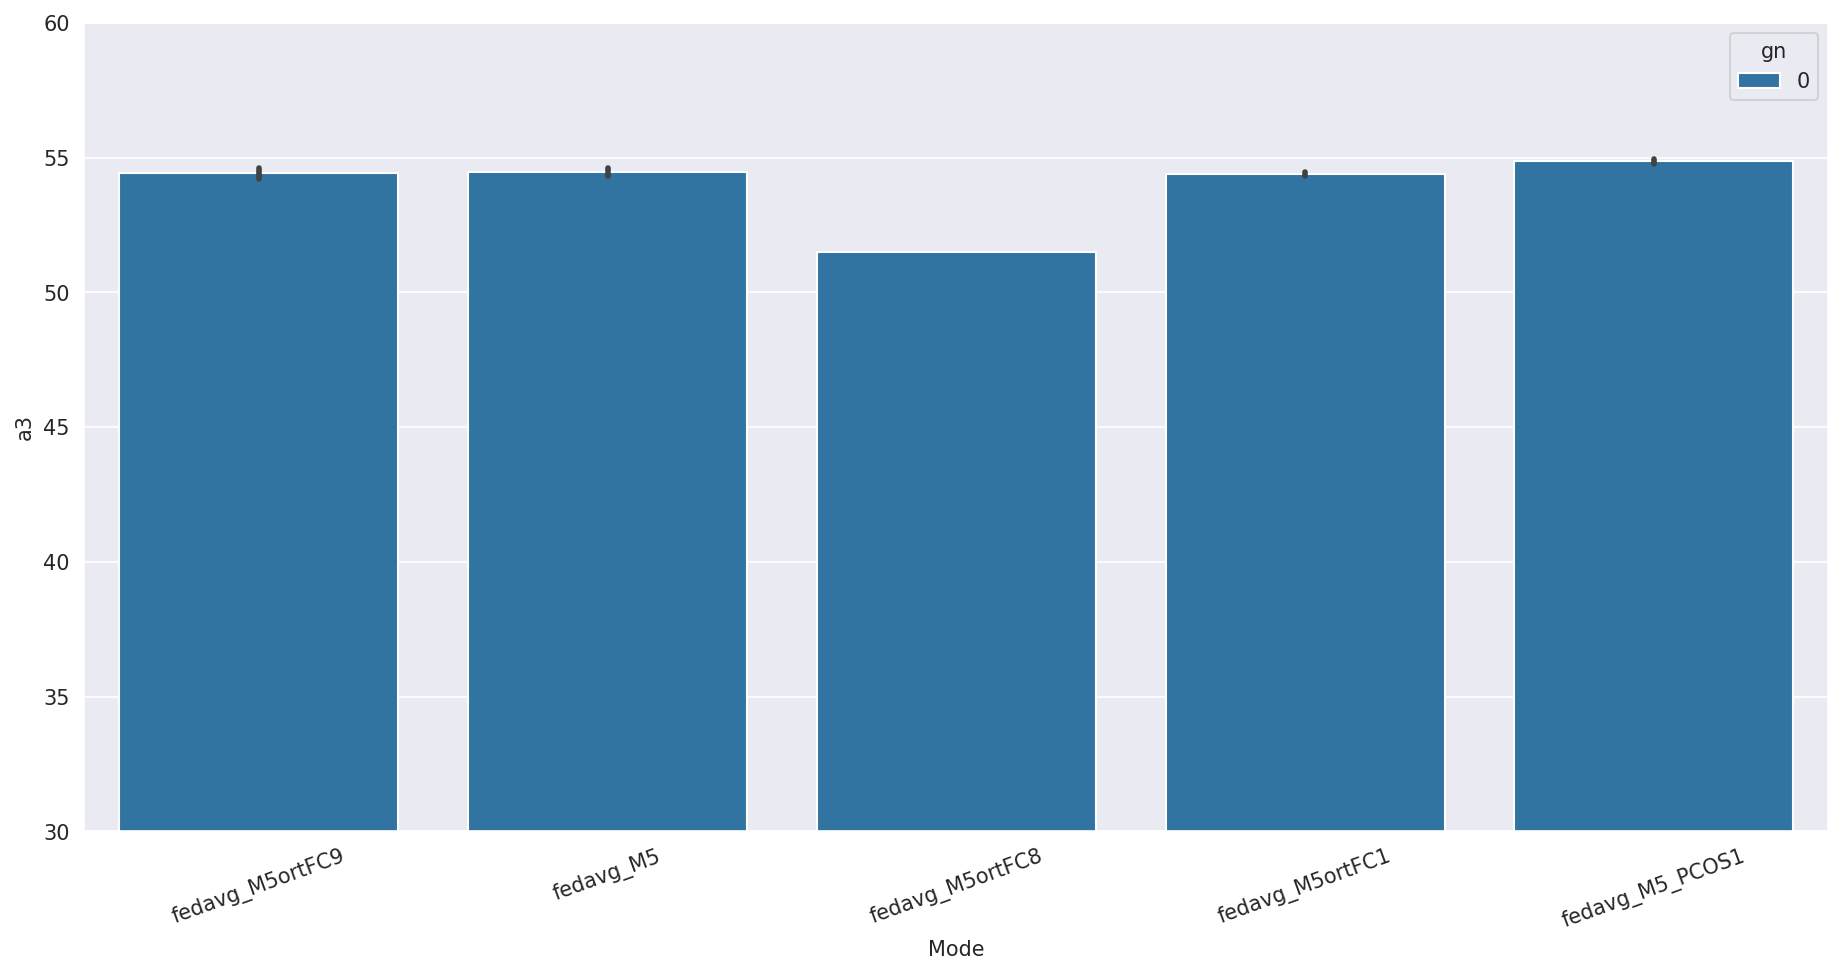

In [112]:
data_temp = load_data()

fig, axes = plt.subplots(1, 1, figsize=(15,7), dpi=150, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    # temp = temp[(temp["epoch"] == 299) | (temp["epoch"] == 599) | (temp["epoch"] == 799) | (temp["epoch"] == 999)]
    temp = temp[(temp["epoch"] == 999)]
    temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddyn") & (temp["Mode"] != "feddyn_M5") & (temp["Mode"] != "fedprox_M5")]
    temp = temp[(temp["Mode"] != "fedavg") & (temp["Mode"] != "fedavg_PCOS1")]
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    ax = sns.barplot(data=temp, x="Mode", y="a3", hue="gn", ax=ax)
    ax.set_ylim([30,60])
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 20)
print(ax.get_xticklabels())

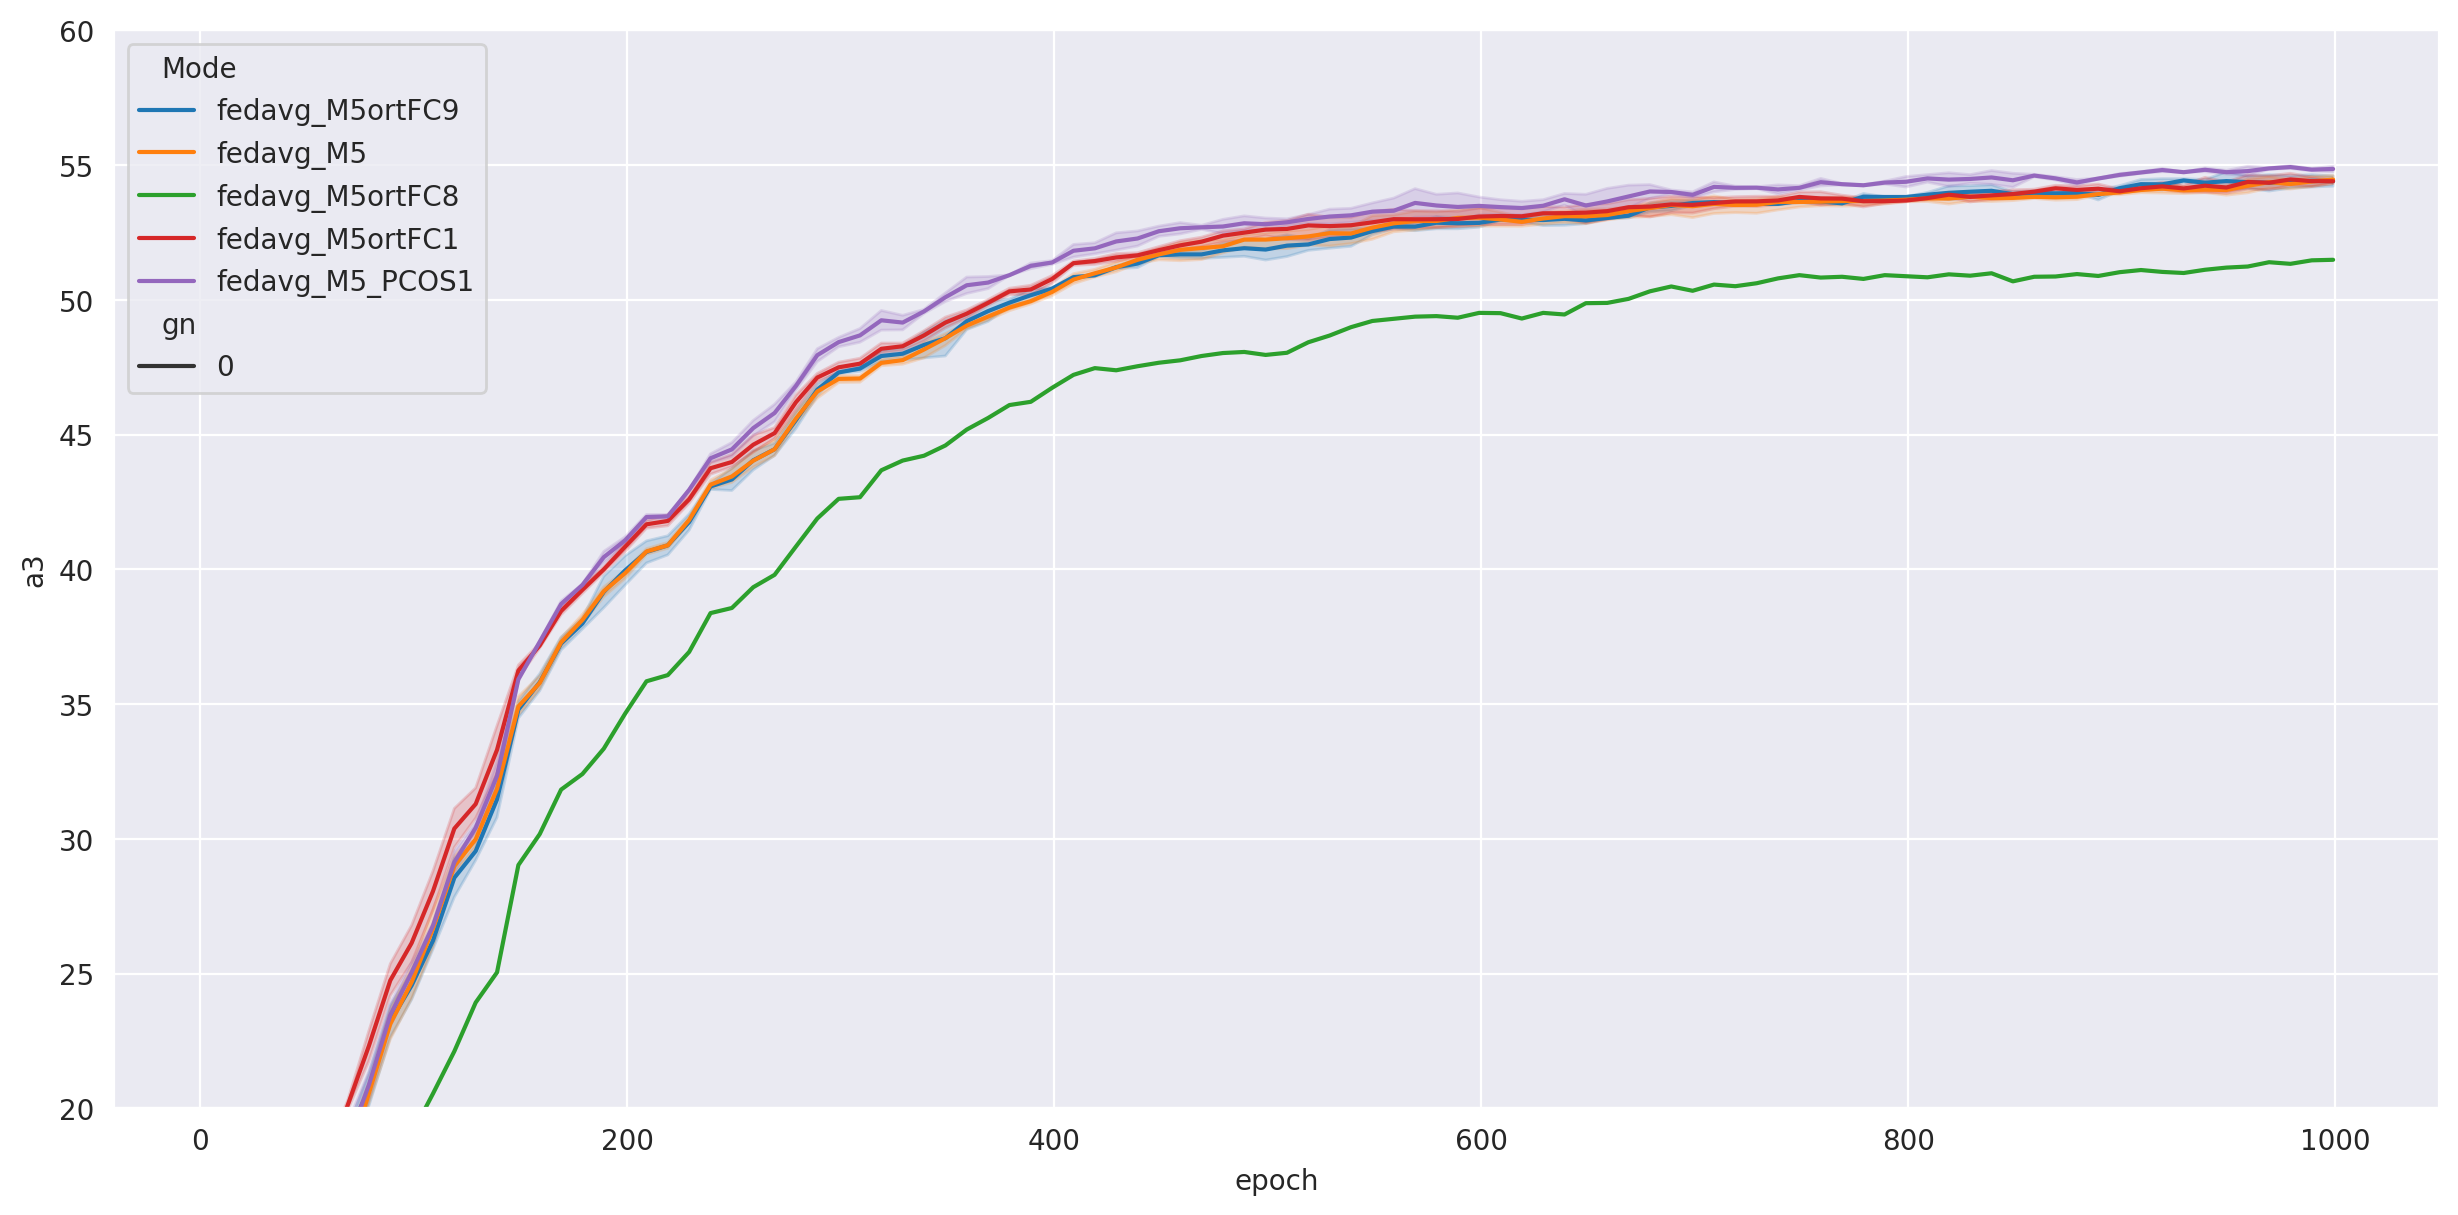

In [110]:
data_temp = load_data()

fig, axes = plt.subplots(1, 1, figsize=(15,7), dpi=200, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddyn") & (temp["Mode"] != "feddyn_M5") & (temp["Mode"] != "fedprox_M5")]
    temp = temp[(temp["Mode"] != "fedavg") & (temp["Mode"] != "fedavg_PCOS1")]
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", style="gn", ax=ax)
    ax.set_ylim([20,60])